Our current predictive model is based on the average rating of an actor's past movies. To explore the impact of additional variables on our predictions, we propose incorporating the number of times an actor has collaborated with directors. This adjustment is designed to test whether these collaborative dynamics significantly affect the actor's movie ratings, thereby offering deeper insights into the factors that influence our predictive accuracy.

## Data Cleaning

In addition to the initial data cleaning, such as grouping identical factors, merging distinct groups, and eliminating unnecessary variables, we intend to perform a more comprehensive data cleansing focusing on movie genres. Upon examining the list of unique genres, we identified categories like 'Music' and 'Animation' that typically do not require live-action human actors. Consequently, we will exclude these genres to ensure our analysis is more relevant to the context of human actor performances.

In [1]:
import pandas as pd
import numpy as np
import ast
from itertools import product
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
data = pd.read_csv('filtered_2.csv')
data = data.rename(columns={'name': 'actors'})
data = data.rename(columns={'Director': 'director'})
data

,id,movie,date,rating,actors,genre,language,director
0,1000001,Barbie,2023.0,3.91,"['Margot Robbie', 'Lewis Easter', 'Onyemachi E...","['Comedy', 'Fantasy', 'Adventure']",English,['Greta Gerwig']
1,1000003,Everything Everywhere All at Once,2022.0,4.32,"['Randall Archer', 'Boon Pin Koh', 'Efka Kvara...","['Science Fiction', 'Action', 'Adventure']",English,"['Daniel Kwan', 'Daniel Scheinert']"
2,1000004,Fight Club,1999.0,4.27,"['Leonard Termo', 'Greg Bronson', 'Michael Art...",['Drama'],English,['David Fincher']
3,1000005,Interstellar,2014.0,4.32,"['Lena Georgas', 'Jeff Hephner', 'Elyes Gabel'...","['Science Fiction', 'Drama', 'Adventure']",English,['Christopher Nolan']
4,1000006,Joker,2019.0,3.83,"['Danny Schoch', 'Graham Mabry', 'Steven Elson...","['Thriller', 'Drama', 'Crime']",English,['Todd Phillips']
...,...,...,...,...,...,...,...,...
36359,1126883,Bangaram,2006.0,2.97,"['Ashutosh Rana', 'Trisha Krishnan', 'L. B. Sr...","['Drama', 'Action']",English,['Dharani']
36360,1127955,Emu War - OverSimplified,2018.0,3.53,['Stuart Webster'],"['Documentary', 'History']",English,['Stuart Webster']
36361,1127969,Lee Evans: Wired and Wonderful,2002.0,3.56,['Lee Evans'],['Comedy'],English,['Tom Poole']
36362,1128916,The Return of 'Allo 'Allo!,2007.0,3.62,"['Gorden Kaye', 'Vicki Michelle', 'Arthur Bost...",['Documentary'],English,['Dennis Martin']


In [3]:
# List out the unique genres across all movies
unique_genres = set()

for genre_list_string in data['genre']:
    genre_list = ast.literal_eval(genre_list_string)
    unique_genres.update(genre_list)
    
unique_genres_list = list(unique_genres) 
unique_genres_list


['Documentary',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Western',
 'Drama',
 'Adventure',
 'Comedy',
 'Family',
 'Mystery',
 'Thriller',
 'Animation',
 'Action',
 'History',
 'Fantasy',
 'Horror',
 'Music',
 'Crime',
 'War']

In [4]:
# Filter movies that include 'Music'and 'Animation' genres
required_genres = {'Music', 'Animation'}
mask = data['genre'].apply(lambda genres: any(genre in genres for genre in required_genres))
filtered_movies = data[mask]
filtered_movies


,id,movie,date,rating,actors,genre,language,director
5,1000007,Spider-Man: Into the Spider-Verse,2018.0,4.43,"['Donna Lynn Leavy', 'Lex Lang', 'Harrison Kni...","['Adventure', 'Animation', 'Science Fiction', ...",English,"['Rodney Rothman', 'Peter Ramsey', 'Bob Persic..."
7,1000009,La La Land,2016.0,4.05,"['Carol Connors', 'Daniel Gaymon', 'Patrick Co...","['Drama', 'Comedy', 'Music', 'Romance']",English,['Damien Chazelle']
11,1000013,Whiplash,2014.0,4.43,"['Jimmie Kirkpatrick', 'April Grace', 'Daniel ...","['Drama', 'Music']",English,['Damien Chazelle']
16,1000018,Spider-Man: Across the Spider-Verse,2023.0,4.47,"['June Christopher', 'Michelle Jubilee Gonzale...","['Science Fiction', 'Action', 'Animation', 'Ad...",English,"['Joaquim Dos Santos', 'Justin K. Thompson', '..."
51,1000054,Ratatouille,2007.0,4.20,"['Michael Giacchino', 'Brad Bird', 'Stéphane R...","['Fantasy', 'Animation', 'Family', 'Comedy']",English,['Brad Bird']
...,...,...,...,...,...,...,...,...
36328,1116855,VeggieTales: Dave and the Giant Pickle,1996.0,3.38,"['Chris Olsen', 'Lisa Vischer', 'Phil Vischer'...","['Music', 'Family', 'Comedy', 'Animation', 'Ad...",English,"['Mike Nawrocki', 'Phil Vischer']"
36329,1117141,Angel,1998.0,3.52,['Patrick Tubajon'],['Music'],English,['Wayne Yung']
36340,1119428,Iron Maiden: En Vivo!,2012.0,3.69,"['Janick Gers', 'Adrian Smith', 'Dave Murray',...",['Music'],English,['Andy Matthews']
36342,1119474,Tekken: Bloodline,2022.0,3.24,"['Jamieson Price', 'Kaiji Tang', 'Vivian Lu', ...",['Animation'],English,['Yoshikazu Miyao']


In [5]:
# Delete movies that have genre of 'Music' or 'Animation' 
mask_to_delete = ~mask
data = data[mask_to_delete]



## Data Exploring

To ascertain the impact of incorporating the 'director' factor on predicting actor ratings, it is essential to construct a Collaboration Network. This involves quantifying the number of distinct directors with whom each actor has collaborated, along with the frequency of their collaborations. Such an analysis will provide valuable insights into the director-actor dynamic and its potential influence on actor performance metrics.

In [6]:
# Create the actor-director list and calculate the average rating, also count how many time they collaborated
data_copy = data.copy()
data_copy['actors'] = data_copy['actors'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
data_copy['director'] = data_copy['director'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

data_exploded = data_copy.explode('actors').explode('director')
grouped = data_exploded.groupby(['actors', 'director'])
grouped_ratings = grouped['rating'].agg(['mean', 'count']).reset_index()
grouped_ratings = grouped_ratings.rename(columns={'count': 'collaboration'})
grouped_ratings.head(6)





,actors,director,mean,collaboration
0,"""Freeway"" Ricky Ross",Matthew Cooke,3.430,1
1,"""Hollywood Jade"" Anderson",Adam Shankman,3.430,1
2,"""Lil' Mikey"" Davis",Steve James,3.890,1
3,"""Scary"" Larry Gygax",Matt Jaissle,2.720,1
4,''Knife'' Sotelo,Andy Qualtrough,2.310,1
5,''Knife'' Sotelo,Dustin Ferguson,2.385,2


In [7]:
# Sort the actor-director list rating
grouped_ratings_sorted = grouped_ratings.sort_values(by='mean', ascending=False)
grouped_ratings_sorted

,actors,director,mean,collaboration
185959,Douglas Spain,Phil Alden Robinson,4.68,1
501046,Nicholas Aaron,Phil Alden Robinson,4.68,1
456600,Matthew Leitch,Mikael Salomon,4.68,1
163400,David Schwimmer,Tony To,4.68,1
501049,Nicholas Aaron,Tom Hanks,4.68,1
...,...,...,...,...
613625,Shavon Kirksey,James Wong,0.89,1
205261,Emmy Rossum,James Wong,0.89,1
210501,Ernie Hudson,James Wong,0.89,1
115554,Chow Yun-fat,James Wong,0.89,1


In [8]:
# find the number of collaborations more than 1
more_than_one_collaboration = grouped_ratings[grouped_ratings['collaboration'] > 1]
more_than_one_collaboration


,actors,director,mean,collaboration
5,''Knife'' Sotelo,Dustin Ferguson,2.385000,2
21,'Evil' Ted Smith,Steve Wang,3.140000,2
32,'Sister' Carol East,Jonathan Demme,3.610000,3
35,'Weird Al' Yankovic,David Zucker,3.565000,2
50,'Wild Bill' Laczko,George A. Romero,3.865000,2
...,...,...,...,...
704207,Ángel del Pozo,Richard Lester,3.400000,2
704325,Ériq Ebouaney,Brian De Palma,2.960000,2
704385,Ólafur Darri Ólafsson,Ben Stiller,2.890000,2
704576,Амеара Лавей,Lucifer Valentine,1.853333,3


##  Data Visualization

For the purpose of visualizing our dataset, we aim to extract a sample of 100 Actor-Director pairs. Our objective is to determine the average ratings associated with each pair. This analysis will shed light on the correlation between the frequency of collaboration and the resultant ratings, offering insights into the dynamics of Actor-Director partnerships

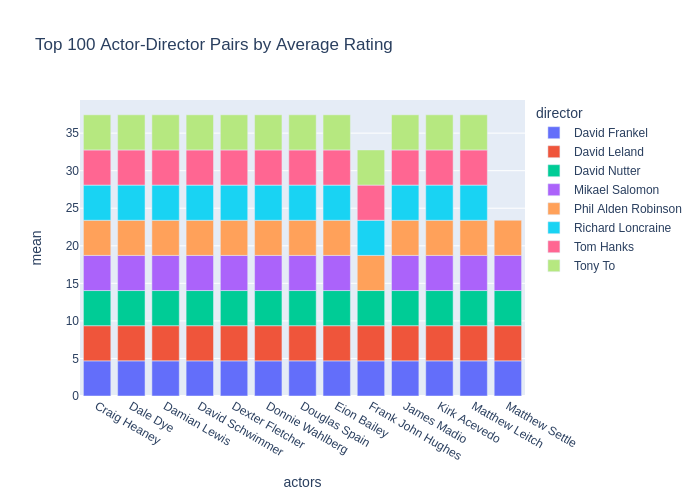

In [10]:
# The top 100 average rating of actor-director pairs
top_n = grouped_ratings.nlargest(100, 'mean')

fig = px.bar(top_n, y='mean', x='actors', color='director', title='Top 100 Actor-Director Pairs by Average Rating')
fig.write_image("top_100_actor_director_pairs.png")

Image(filename="top_100_actor_director_pairs.png")


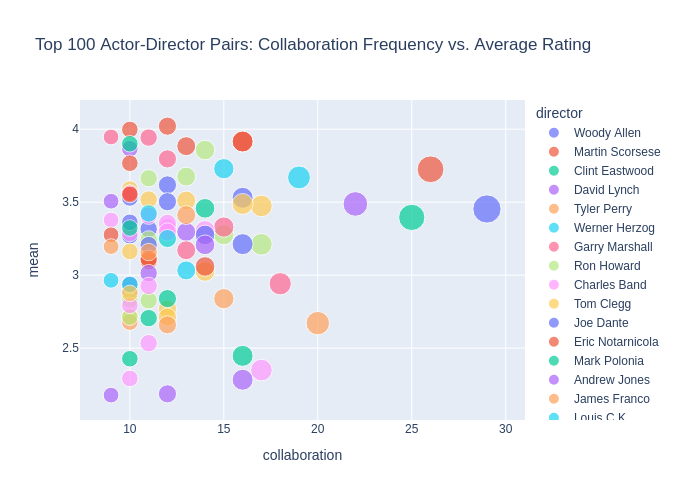

In [11]:
# The top 100 number of collaboration of actor-director pairs
top_100 = grouped_ratings.nlargest(100, 'collaboration')

fig = px.scatter(top_100, x='collaboration', y='mean',
                 size='collaboration',  
                 hover_name='actors',  
                 hover_data=['director'], 
                 color='director',      
                 title='Top 100 Actor-Director Pairs: Collaboration Frequency vs. Average Rating')

fig.write_image("top_100_actor_director_pairs_analysis.png")
Image(filename="top_100_actor_director_pairs_analysis.png")

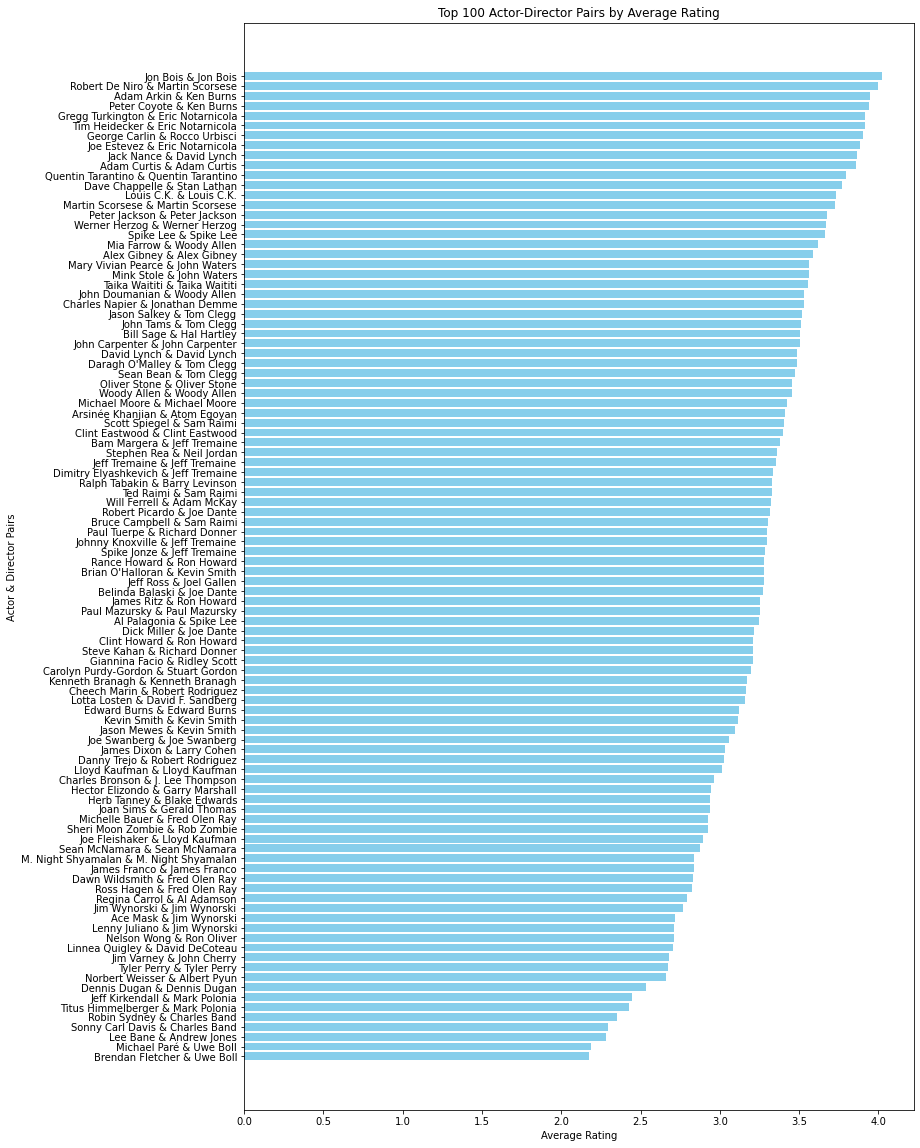

In [12]:
# Visualizing of rating of top 100 actor-director pairs 
top_100_collaborations = grouped_ratings.nlargest(100, 'collaboration')
top_100_sorted_by_rating = top_100_collaborations.sort_values(by='mean', ascending=False)
plt.figure(figsize=(12, 20))
plt.barh(top_100_sorted_by_rating['actors'] + ' & ' + top_100_sorted_by_rating['director'], 
         top_100_sorted_by_rating['mean'], color='skyblue')
plt.xlabel('Average Rating')
plt.ylabel('Actor & Director Pairs')
plt.title('Top 100 Actor-Director Pairs by Average Rating')
plt.gca().invert_yaxis()
plt.yticks(rotation=0)

plt.show()


## Accuracy of Prediction

We will evaluate the predictive accuracy of our model, which currently estimates actor ratings without accounting for director collaborations. The model has generated predicted ratings for Ryan Gosling, Rooney Mara, and Jesse Eisenberg, with scores of 3.66008697, 3.45609447, and 3.15795158 respectively. To assess the precision of these predictions, we will compare them to the actual mean ratings derived from the actor-director pairs. This comparison aims to determine the impact of including director collaborations on the accuracy of our actor rating predictions.

In [13]:
# Filter the DataFrame for these actors and display the scores
actors_to_filter = ['Ryan Gosling', 'Rooney Mara', 'Jesse Eisenberg']
filtered_actor_scores = grouped_ratings[grouped_ratings['actors'].isin(actors_to_filter)]
filtered_actor_scores[['actors', 'director', 'mean']]

,actors,director,mean
312390,Jesse Eisenberg,Alice Wu,3.930
312391,Jesse Eisenberg,Brian Koppelman,3.020
312392,Jesse Eisenberg,David Fincher,3.960
312393,Jesse Eisenberg,David Levien,3.020
312394,Jesse Eisenberg,David Prior,3.880
...,...,...,...
589644,Ryan Gosling,Nicolas Winding Refn,3.485
589645,Ryan Gosling,Robert Tinnell,2.970
589646,Ryan Gosling,Ruben Fleischer,2.750
589647,Ryan Gosling,Ryan Fleck,3.610


In [14]:
# Calculate the mean rating for each of the specified actors across all their collaborations,
mean_actor_ratings = grouped_ratings[grouped_ratings['actors'].isin(actors_to_filter)].groupby('actors')['mean'].mean().reset_index()
mean_actor_ratings

,actors,mean
0,Jesse Eisenberg,3.257955
1,Rooney Mara,3.209808
2,Ryan Gosling,3.410312


In [15]:
# Creating a new DataFrame to add predicted scores for the specified actors
predicted_scores = {'Ryan Gosling': 3.66008697, 'Rooney Mara': 3.45609447,'Jesse Eisenberg': 3.15795158}
predicted_scores_df = pd.DataFrame(list(predicted_scores.items()), columns=['actors', 'predicted_score'])
merged_ratings = mean_actor_ratings.merge(predicted_scores_df, on='actors', how='left')
merged_ratings

,actors,mean,predicted_score
0,Jesse Eisenberg,3.257955,3.157952
1,Rooney Mara,3.209808,3.456094
2,Ryan Gosling,3.410312,3.660087


In [16]:
# Calculate MAE and MSE between the 'mean' column (actual) and 'predicted_score' column (predictions).
mae = np.mean(np.abs(merged_ratings['mean'] - merged_ratings['predicted_score']))
mse = np.mean((merged_ratings['mean'] - merged_ratings['predicted_score']) ** 2)

(mae, mse)

(0.19868807104895106, 0.04434835194318141)